### Escolha da Série e Retornos

[*********************100%%**********************]  1 of 1 completed


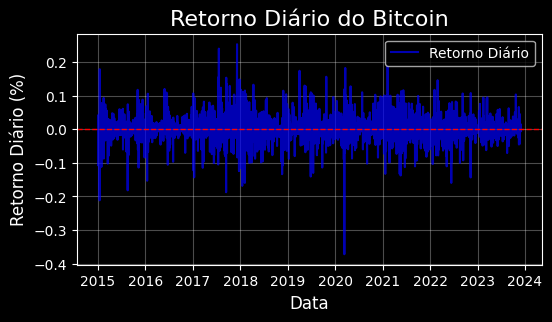

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

# Defina os parâmetros
symbol = "BTC-USD"  # Símbolo do Bitcoin
start_date = "2015-01-01"   # Data de início
end_date = "2023-12-01"     # Data de fim

# Baixa os dados históricos do Bitcoin
dados = yf.download(symbol, start=start_date, end=end_date)

# Calcula o retorno diário
dados['Retorno Diário'] = dados['Adj Close'].pct_change().dropna()

# Plota o gráfico de retornos diários
plt.style.use('dark_background')
plt.figure(figsize=(6, 3))
plt.plot(dados['Retorno Diário'], label='Retorno Diário', color='blue', alpha=0.7)
plt.title('Retorno Diário do Bitcoin', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Diário (%)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### volatilidade

c:\Users\limam\Documents\Programação\Python\Projetos\Streamlit_Apps\Fractal\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                    Zero Mean - TARCH/ZARCH Model Results                     
Dep. Variable:         Retorno Diário   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:                6334.55
Distribution:                  Normal   AIC:                          -12661.1
Method:            Maximum Likelihood   BIC:                          -12636.7
                                        No. Observations:                 3255
Date:                Fri, Dec 06 2024   Df Residuals:                     3255
Time:                        15:02:09   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.7952e-03  9.867e-03      0.385      0.701 

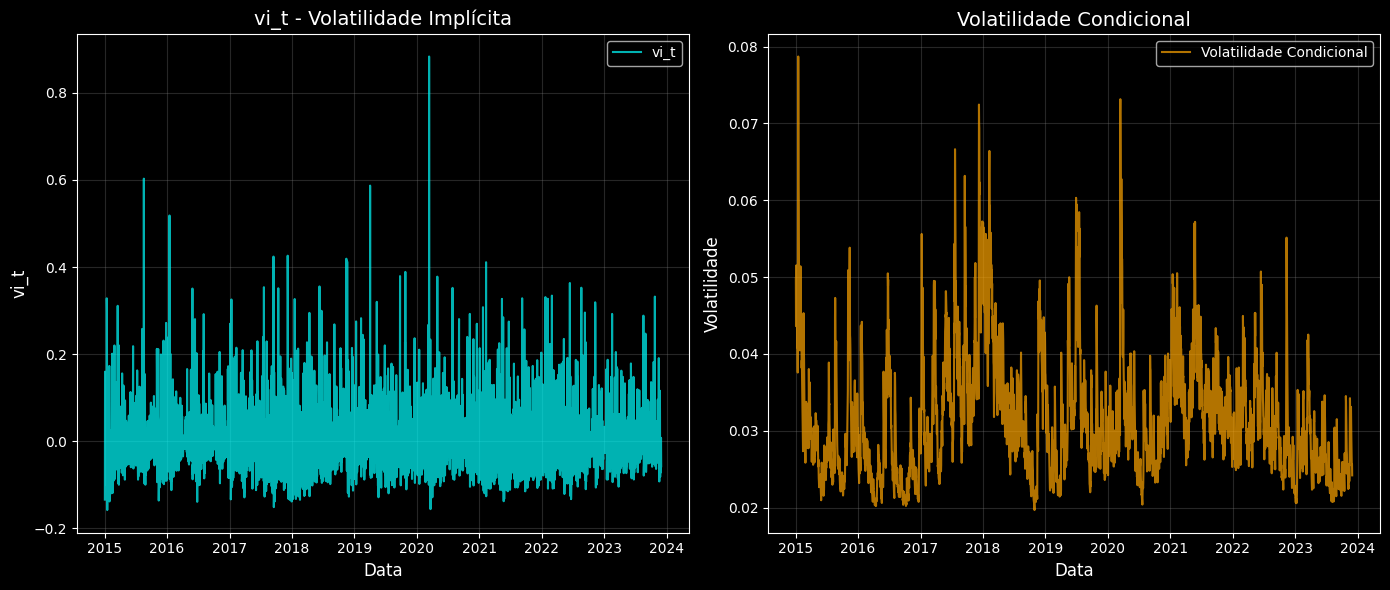

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Definir o modelo TGARCH (1,1)
model = arch_model(dados['Retorno Diário'].dropna(), mean="Zero", p=1, o=1, q=1, power=1.0)
retorno = dados['Retorno Diário'].dropna()

# Ajustar o modelo
result = model.fit(disp="off")

# Exibir o resumo do ajuste do modelo
print(result.summary())

# Calcular a volatilidade condicional
conditional_vol = result.conditional_volatility

# Calcular vi_t
vi_t = np.log(conditional_vol) - np.log(conditional_vol.shift(1))

# Configura o estilo do gráfico com fundo preto
plt.style.use('dark_background')
# Criar dois gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: vi_t
axs[0].plot(vi_t, label="vi_t", color='cyan', alpha=0.7)
axs[0].set_title('vi_t - Volatilidade Implícita', fontsize=14, color='white')
axs[0].set_xlabel('Data', fontsize=12, color='white')
axs[0].set_ylabel('vi_t', fontsize=12, color='white')
axs[0].grid(alpha=0.3, color='gray')
axs[0].legend()

# Gráfico 2: conditional_vol
axs[1].plot(conditional_vol, label="Volatilidade Condicional", color='orange', alpha=0.7)
axs[1].set_title('Volatilidade Condicional', fontsize=14, color='white')
axs[1].set_xlabel('Data', fontsize=12, color='white')
axs[1].set_ylabel('Volatilidade', fontsize=12, color='white')
axs[1].grid(alpha=0.3, color='gray')
axs[1].legend()

# Ajustar layout e exibir os gráficos
plt.tight_layout()
plt.show()


### Qcc

In [21]:
def Qcc(m, x, y):
    N = len(x)
    assert len(y) == N, '{} segments'.format(len(y))
    
    bunbo = np.sqrt(np.sum(x**2)*np.sum(y**2))
    C_ = []
    for j in range(1, m+1):
        x = np.delete(x, 0)
        y = np.delete(y, len(y)-1)
        assert len(x) == N-j, '{} segments'.format(len(x))
        assert len(y) == N-j, '{} segments'.format(len(x))
        C_ = np.append(C_, np.sum(x*y))
    
    C_ = C_/bunbo
    to_sum = np.array([(C_[i-1]**2)/(N-i) for i in range(1, m+1)])
    ans = (N**2)*np.cumsum(to_sum)
    return ans

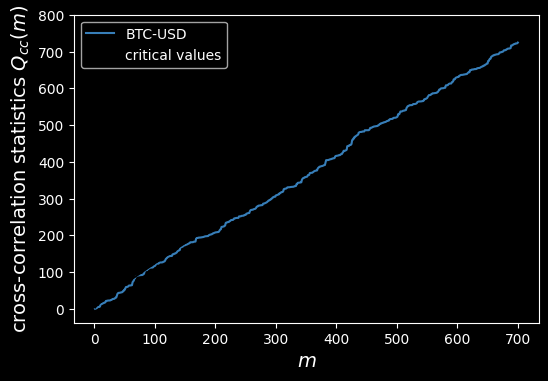

In [23]:
"""
    repeat for each data series
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import pandas as pd # data preprocessing
import seaborn as sns # graph style
from scipy.stats import norm
import time
from tqdm.notebook import tqdm
from scipy.stats import rankdata
import pandas.tseries.offsets as offsets
import scipy.stats as stats
import statsmodels.api as sm

nm = 700

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel('$m$', size=14)
plt.ylabel('cross-correlation statistics '+r'$Q_{cc}(m)$', size=14)
xjiku = list(range(1, nm+1))

# dataset
retorno = dados['Retorno Diário'].dropna()
vi_t = vi_t.dropna()

dat_ret_btc = np.copy(retorno[1:].values)
dat_BPV_btc = np.copy(vi_t.values)

plt.plot(xjiku, Qcc(nm, dat_ret_btc, dat_BPV_btc), label=symbol, color='#377eb8') # plot
#plt.plot(xjiku, Qcc(nm, dat_RV_eth, dat_ret_eth), label='ETH', color='#e41a1c') #plot
#plt.plot(xjiku, Qcc(nm, dat_ret_xrp, dat_RV_xrp), label='XRP', color='#2ca02c') # plot
#plt.plot(xjiku, Qcc(nm, dat_ret_ltc, dat_RV_ltc), label='LTC', color='#ff7f0e') # plot

threshold = []
for m in range(1, nm+1):
    threshold = np.append(threshold, scipy.stats.chi2.interval(0.9, m)[1]) # 有意水準, 自由度

plt.plot(xjiku, threshold, label = 'critical values', color='black') #plot
#plt.xscale('log')
#plt.yscale('log')
legend = plt.legend(frameon=True)
#save as pdf
#plt.savefig('Qcc_160601_201228_price-volatility_RV.pdf', bbox_inches="tight")
plt.show()

### Gráficos

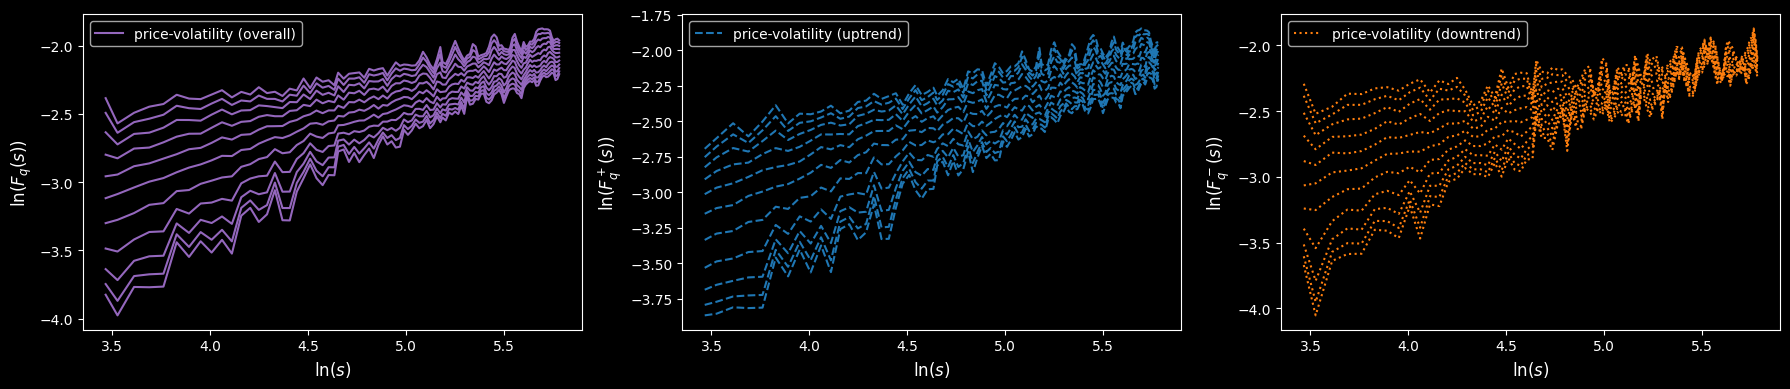

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mf_adcca import dcca, basic_dcca

# Configurações iniciais
dat1 = np.copy(retorno[1:].values)
dat2 = np.copy(vi_t.values)

# Base de tendência para indexação
trend_base = np.exp(np.cumsum(retorno[1:].values))  # Base exponencial

# Função para cálculo e organização de DCCA
def compute_log_dcca(dat1, dat2, q_values, indices):
    """Calcula e retorna os valores de log(F_q(s)) para os valores de Q e índices especificados."""
    plot_data = []
    for q in q_values:
        result = np.reshape(basic_dcca(dat1, dat2, Q=[q])[indices], [2, 100])
        plot_data.append(np.log(result))
    return plot_data

# Valores de Q
q_values = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]

# Cálculo dos dados
overall_data = compute_log_dcca(dat1, dat2, q_values, indices=slice(0, 2))
uptrend_data = compute_log_dcca(dat1, dat2, q_values, indices=slice(3, 5))
downtrend_data = compute_log_dcca(dat1, dat2, q_values, indices=slice(6, 8))

# Configurações de cores e estilos
colors = ['#9467bd', '#1f77b4', '#ff7f0e']
linestyles = ['solid', 'dashed', 'dotted']
labels = ['price-volatility (overall)', 'price-volatility (uptrend)', 'price-volatility (downtrend)']

# Plotagem
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
trend_titles = [r'$\ln(F_q(s))$', r'$\ln(F^+_q(s))$', r'$\ln(F^-_q(s))$']

for ax, data, color, linestyle, label, title in zip(axes, 
                                                    [overall_data, uptrend_data, downtrend_data], 
                                                    colors, linestyles, labels, trend_titles):
    ax.set_xlabel(r'$\ln(s)$', size=12)
    ax.set_ylabel(title, size=12)
    ax.grid(which='both')
    ax.grid(which='major')
    
    for plot_data in data:
        ax.plot(plot_data[0], plot_data[1], linestyle=linestyle, color=color, markersize=5)
    
    ax.plot([], [], linestyle=linestyle, color=color, label=label)  # Placeholder para legenda
    ax.legend(frameon=True)

# Exibição
plt.tight_layout()
plt.show()


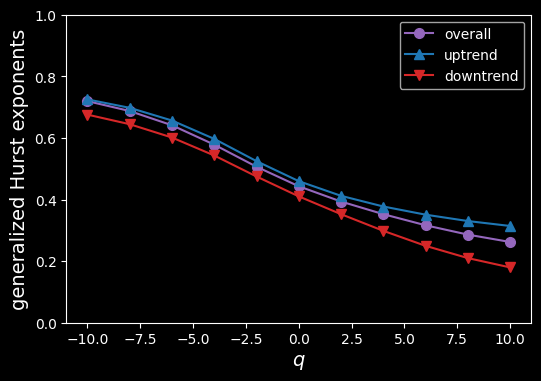

In [12]:
## asymmetric generalized hurst exponent

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel('$q$', size=14)
plt.ylabel('generalized Hurst exponents', size=14)
#plot
#"""
est_results_xy = basic_dcca(dat1, dat2, Q=q_values, trend_base=trend_base, asymmetry_base='optional')
#"""

#plt.title('MF-ADCCA for price-volatility cross-correlations in '+ asset, size=14)
plt.plot(q_values, est_results_xy[2], marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(q_values, est_results_xy[5], marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(q_values, est_results_xy[8], marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')
#plt.xlim(-6, 6)
plt.ylim(0, 1)
legend = plt.legend(frameon=True)

# save as pdf
#plt.savefig('__.pdf', bbox_inches="tight")
plt.show()

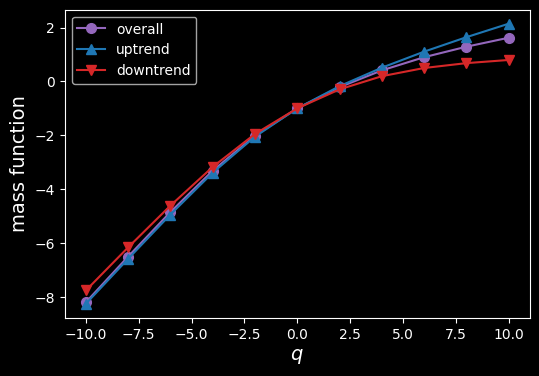

In [ ]:
fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel('$q$', size=14)
plt.ylabel('mass function', size=14)
#plot
gh_xy_overall = est_results_xy[2]
gh_xy_uptrend = est_results_xy[5]
gh_xy_downtrend = est_results_xy[8]

plt.plot(q_values, gh_xy_overall*q_values-1, marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(q_values, gh_xy_uptrend*q_values-1, marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(q_values, gh_xy_downtrend*q_values-1, marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')

legend = plt.legend(frameon=True)

# save as pdf
#plt.savefig('__.pdf', bbox_inches="tight")
plt.show()

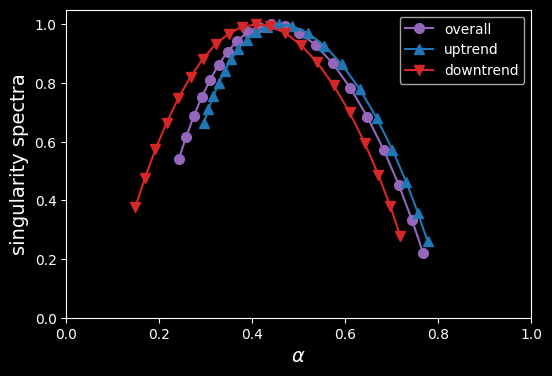

In [25]:
# dataset
dat1 = np.copy(retorno[1:].values)
dat2 = np.copy(vi_t.values)

# decide what base of trend to use
trend_base = np.exp(np.cumsum(retorno[1:].values)) # index-based

fig = plt.figure(figsize=(6,4)) #change figure size
plt.xlabel(r'$\alpha$', size=14)
plt.ylabel('singularity spectra', size=14)
#plot
qorders = np.array([-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]).tolist() # q is set -5 to 5
qorders_D = (np.array(qorders)+0.1).tolist()

#"""
est_results_xy = basic_dcca(dat1, dat2, Q=qorders, trend_base=trend_base, asymmetry_base='optional')
est_results_Dxy = basic_dcca(dat1, dat2, Q=qorders_D, trend_base=trend_base, asymmetry_base='optional')

tau_xy_overall = est_results_xy[2]*qorders-1
tau_xy_uptrend = est_results_xy[5]*qorders-1
tau_xy_downtrend = est_results_xy[8]*qorders-1

tau_Dxy_overall = est_results_Dxy[2]*qorders_D-1
tau_Dxy_uptrend = est_results_Dxy[5]*qorders_D-1
tau_Dxy_downtrend = est_results_Dxy[8]*qorders_D-1

alpha_xy_overall = (tau_Dxy_overall-tau_xy_overall)/0.1
alpha_xy_uptrend = (tau_Dxy_uptrend-tau_xy_uptrend)/0.1
alpha_xy_downtrend = (tau_Dxy_downtrend-tau_xy_downtrend)/0.1
#"""

plt.plot(alpha_xy_overall, qorders*alpha_xy_overall - tau_xy_overall, marker="o", markersize=7, linestyle='solid', label='overall', color='#9467bd')
plt.plot(alpha_xy_uptrend, qorders*alpha_xy_uptrend - tau_xy_uptrend, marker="^", markersize=7, linestyle='solid', label='uptrend', color='#1f77b4')
plt.plot(alpha_xy_downtrend, qorders*alpha_xy_downtrend - tau_xy_downtrend, marker="v", markersize=7, linestyle='solid', label='downtrend', color='#d62728')

legend = plt.legend(frameon=True)
plt.xlim(0, 1)
plt.ylim(0, 1.05) # change plot limits if necessary

# save as pdf
#plt.savefig('__.pdf', bbox_inches="tight")
plt.show()

### Calcular medidas com a série toda.

In [26]:
import numpy as np
import pandas as pd

# Função para calcular f_alpha
def calculate_f_alpha(alpha, tau):
    return qorders * alpha - tau

# Geral
f_alpha_overall = calculate_f_alpha(alpha_xy_overall, tau_xy_overall)
alpha_0_overall = alpha_xy_overall[np.where(f_alpha_overall == 1)[0][0]]
delta_alpha_overall = np.max(alpha_xy_overall) - np.min(alpha_xy_overall)
delL_overall = alpha_0_overall - np.min(alpha_xy_overall)
delR_overall = np.max(alpha_xy_overall) - alpha_0_overall
A_alpha_overall = (delL_overall - delR_overall) / (delL_overall + delR_overall)

# Uptrend
f_alpha_uptrend = calculate_f_alpha(alpha_xy_uptrend, tau_xy_uptrend)
alpha_0_uptrend = alpha_xy_uptrend[np.where(f_alpha_uptrend == 1)[0][0]]
delta_alpha_uptrend = np.max(alpha_xy_uptrend) - np.min(alpha_xy_uptrend)
delL_uptrend = alpha_0_uptrend - np.min(alpha_xy_uptrend)
delR_uptrend = np.max(alpha_xy_uptrend) - alpha_0_uptrend
A_alpha_uptrend = (delL_uptrend - delR_uptrend) / (delL_uptrend + delR_uptrend)

# Downtrend
f_alpha_downtrend = calculate_f_alpha(alpha_xy_downtrend, tau_xy_downtrend)
alpha_0_downtrend = alpha_xy_downtrend[np.where(f_alpha_downtrend == 1)[0][0]]
delta_alpha_downtrend = np.max(alpha_xy_downtrend) - np.min(alpha_xy_downtrend)
delL_downtrend = alpha_0_downtrend - np.min(alpha_xy_downtrend)
delR_downtrend = np.max(alpha_xy_downtrend) - alpha_0_downtrend
A_alpha_downtrend = (delL_downtrend - delR_downtrend) / (delL_downtrend + delR_downtrend)

# Criar DataFrame com os resultados
data = {
    "Métrica": [
        "∆α (grau de multifractalidade)",
        "α₀ (pico da singularidade)",
        "α_max (máximo)",
        "α_min (mínimo)",
        "A_α (assimetria)"
    ],
    "Geral (*Overall*)": [
        delta_alpha_overall,
        alpha_0_overall,
        np.max(alpha_xy_overall),
        np.min(alpha_xy_overall),
        A_alpha_overall
    ],
    "*Uptrend*": [
        delta_alpha_uptrend,
        alpha_0_uptrend,
        np.max(alpha_xy_uptrend),
        np.min(alpha_xy_uptrend),
        A_alpha_uptrend
    ],
    "*Downtrend*": [
        delta_alpha_downtrend,
        alpha_0_downtrend,
        np.max(alpha_xy_downtrend),
        np.min(alpha_xy_downtrend),
        A_alpha_downtrend
    ]
}

df = pd.DataFrame(data)

# Exibir a tabela
print(df)


                          Métrica  Geral (*Overall*)  *Uptrend*  *Downtrend*
0  ∆α (grau de multifractalidade)           0.525425   0.480667     0.569597
1      α₀ (pico da singularidade)           0.440233   0.456840     0.407186
2                  α_max (máximo)           0.767482   0.776829     0.718304
3                  α_min (mínimo)           0.242057   0.296162     0.148707
4                A_α (assimetria)          -0.245654  -0.331435    -0.092414


In [18]:
# Calculate h_(xy) (q)
# q=-10
print((est_results_xy[5] - est_results_xy[8])[0])
# q=2
print((est_results_xy[5] - est_results_xy[8])[12])
# q=10
print((est_results_xy[5] - est_results_xy[8])[20])
# D_(xy)
print(0.5*(np.abs(est_results_xy[2][0]-0.5) + np.abs(est_results_xy[2][20]-0.5)))

0.05500642301671088
0.05309216399566086
0.09017340309170502
0.13889361502188008


### Recursivo

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from mf_adcca import basic_dcca
import matplotlib.pyplot as plt
from arch import arch_model

# Baixando os dados do Bitcoin
btc_data = yf.download("BTC-USD", start="2020-01-01", end="2023-02-01")
daily_return = btc_data['Adj Close'].pct_change().dropna()

# Definir o intervalo de 3 anos e descolá-lo diariamente a partir de 2023
D_xy_series = []
delta_alpha_series = []

# Definindo as ordens de q para o cálculo de DCCA
qorders = np.arange(-10, 11, 1)

qorders_D = (qorders + 0.1).tolist()

# Base indexada (a tendência base)
trend_base = np.exp(np.cumsum(daily_return.values))

# Loop para deslocar o intervalo de 3 anos diariamente em 2023-2024
for i in range(len(btc_data.loc['2023-01-01':])):
    # Definir datas de início e fim com base nos 3 anos anteriores ao índice atual
    end_date = btc_data.index[i + len(btc_data.loc['2020-01-01':'2022-12-31'])]
    start_date = end_date - pd.DateOffset(years=3)
    
    # Verifique se o intervalo de tempo existe para o cálculo
    if start_date not in btc_data.index or end_date not in btc_data.index:
        continue  # pula o loop se o intervalo não existir
    
    # Seleciona os dados dentro do intervalo de 3 anos
    btc_data_window = btc_data.loc[start_date:end_date]
    daily_return_window = btc_data_window['Adj Close'].pct_change().dropna()

    # Ajustar o modelo TGARCH para o cálculo da volatilidade condicional
    model = arch_model(daily_return_window, mean="Zero", vol="Garch", p=1, o=1, q=1, power=1.0)
    result = model.fit(disp="off")
    conditional_vol = result.conditional_volatility

    # Transformação da volatilidade condicional para usar no cálculo multifractal
    BPV_vola_window = np.log(conditional_vol) - np.log(conditional_vol.shift(1))
    BPV_vola_window = BPV_vola_window.dropna().values  # Remove valores NaN

    # Executar o cálculo de DCCA no intervalo de 3 anos
    dat1 = np.copy(daily_return_window[1:].values)
    dat2 = np.copy(BPV_vola_window)

    print(len(dat1))
    print(len(dat2))
    # Realizando a análise multifractal assimétrica
    est_results_xy = basic_dcca(dat1, dat2, Q=qorders.tolist(), trend_base=trend_base, asymmetry_base='optional')
    est_results_Dxy = basic_dcca(dat1, dat2, Q=qorders_D, trend_base=trend_base, asymmetry_base='optional')

    # Calcular tau values
    tau_xy_overall = est_results_xy[2] * qorders - 1
    tau_xy_uptrend = est_results_xy[5] * qorders - 1
    tau_xy_downtrend = est_results_xy[8] * qorders - 1

    tau_Dxy_overall = est_results_Dxy[2] * qorders_D - 1
    tau_Dxy_uptrend = est_results_Dxy[5] * qorders_D - 1
    tau_Dxy_downtrend = est_results_Dxy[8] * qorders_D - 1

    # Calcular alpha values
    alpha_xy_overall = (tau_Dxy_overall - tau_xy_overall) / 0.1
    alpha_xy_uptrend = (tau_Dxy_uptrend - tau_xy_uptrend) / 0.1
    alpha_xy_downtrend = (tau_Dxy_downtrend - tau_xy_downtrend) / 0.1

    # Calcular D_(xy)
    D_xy = 0.5 * (np.abs(tau_xy_overall[0] - 0.5) + np.abs(tau_xy_overall[-1] - 0.5))
    D_xy_series.append(D_xy)

    # Calcular delta alpha (grau de multifractalidade)
    delta_alpha = np.max(alpha_xy_uptrend) - np.min(alpha_xy_uptrend)
    delta_alpha_series.append(delta_alpha)

# Convertendo os resultados em séries temporais
dates = btc_data.loc['2023-01-01':].index[:len(D_xy_series)]
D_xy_series = pd.Series(D_xy_series, index=dates)
delta_alpha_series = pd.Series(delta_alpha_series, index=dates)

# Exibindo os resultados
print("D_(xy) Series:")
print(D_xy_series.head())
print("\nDelta Alpha Series:")
print(delta_alpha_series.head())

# Visualizando as séries temporais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(D_xy_series, label='D_(xy)', color='blue')
plt.title('D_(xy) ao longo do tempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delta_alpha_series, label='Delta Alpha (Multifractality)', color='green')
plt.title('Delta Alpha ao longo do tempo')
plt.legend()

plt.tight_layout()
plt.show()


D_(xy) Series:
Date
2023-01-01    5.213236
2023-01-02    5.247051
2023-01-03    5.235831
2023-01-04    5.290385
2023-01-05    5.263296
dtype: float64

Delta Alpha Series:
Date
2023-01-01    0.648460
2023-01-02    0.629604
2023-01-03    0.597125
2023-01-04    0.513568
2023-01-05    0.492008
dtype: float64


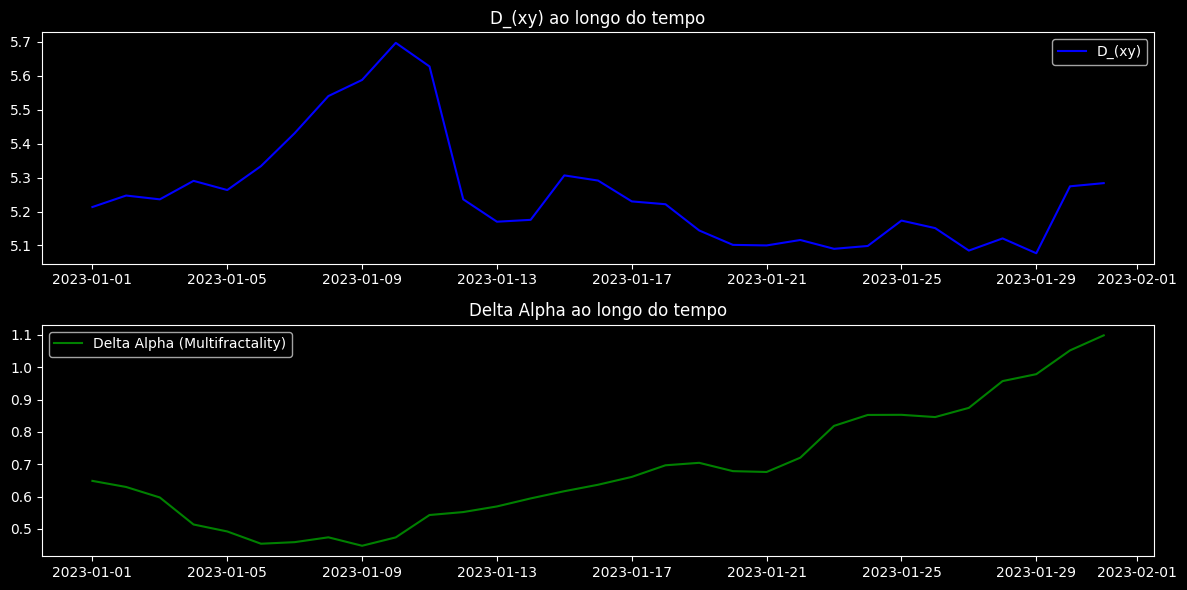

In [28]:
# Exibindo os resultados
print("D_(xy) Series:")
print(D_xy_series.head())
print("\nDelta Alpha Series:")
print(delta_alpha_series.head())

# Visualizando as séries temporais
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(D_xy_series, label='D_(xy)', color='blue')
plt.title('D_(xy) ao longo do tempo')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(delta_alpha_series, label='Delta Alpha (Multifractality)', color='green')
plt.title('Delta Alpha ao longo do tempo')
plt.legend()

plt.tight_layout()
plt.show()